In [ ]:
import pandas as ps
import numpy as np
import seaborn as sb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
datos = ps.read_csv('/content/sample_data/rezagoslp.csv', delimiter=';')
datos

,Municipio,Poblacion,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire,Rezago,clasificacion
0,Ahualulco,"18,974",8.0,5.2,39.7,20.1,8.4,8.1,16.2,11.4,2.7,32.5,14.5,Bajo,2
1,Alaquines,"7,785",11.2,5.0,50.4,15.0,7.2,2.8,28.6,33.7,2.7,28.7,22.1,Medio,3
2,Armadillo de los Infante,"4,013",10.4,16.8,57.4,14.6,3.5,5.2,13.9,14.9,3.3,36.0,18.1,Medio,3
3,Cárdenas,"18,317",5.7,5.6,35.1,23.4,6.6,1.2,6.9,7.4,1.9,19.2,12.6,Bajo,2
4,Catorce,"9,579",10.1,6.4,42.6,10.4,7.5,5.9,19.4,13.5,3.7,35.6,22.5,Medio,3
5,Cedral,"19,840",6.0,3.6,33.7,13.9,2.8,1.9,5.3,3.4,1.1,18.7,10.0,Muy bajo,1
6,Cerritos,"22,075",5.4,4.7,38.1,21.0,3.4,0.8,5.1,16.8,1.4,16.1,10.0,Bajo,2
7,Ciudad del Maíz,"30,320",7.4,5.4,43.1,13.8,5.6,1.8,17.7,21.2,1.8,20.1,14.9,Bajo,2
8,Ciudad Fernández,"48,106",5.7,5.1,35.1,18.5,6.1,0.9,1.6,3.9,0.9,16.2,9.2,Muy bajo,1
9,Tancanhuitz,"20,300",7.8,2.4,36.7,22.7,19.2,2.7,38.9,20.6,6.0,76.4,43.9,Alto,4


In [ ]:
datos.head(1)

,Municipio,Poblacion,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire,Rezago,clasificacion
0,Ahualulco,"18,974",8.0,5.2,39.7,20.1,8.4,8.1,16.2,11.4,2.7,32.5,14.5,Bajo,2


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      54 non-null     object 
 1   Poblacion      54 non-null     object 
 2   p15a           54 non-null     float64
 3   p6a14noe       54 non-null     float64
 4   p15ymbin       54 non-null     float64
 5   psiss          54 non-null     float64
 6   vipt           54 non-null     float64
 7   visexsa        54 non-null     float64
 8   visagen        54 non-null     float64
 9   visidr         54 non-null     float64
 10  visee          54 non-null     float64
 11  visila         54 non-null     float64
 12  visire         54 non-null     float64
 13  Rezago         54 non-null     object 
 14  clasificacion  54 non-null     int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
print(datos.groupby('clasificacion').size())

clasificacion
1     7
2    28
3    14
4     4
5     1
dtype: int64


<Axes: >

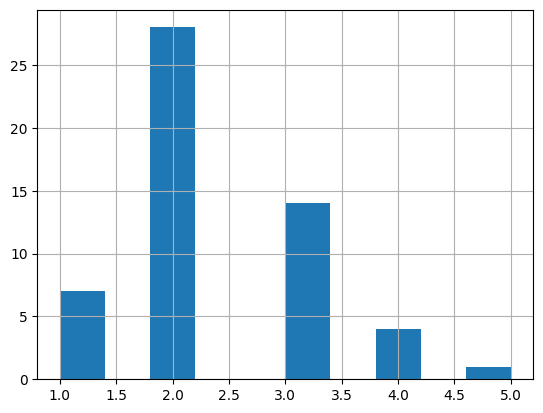

In [ ]:
datos.clasificacion.hist() #histograma - se va por intervalos y espacio entre las columnas

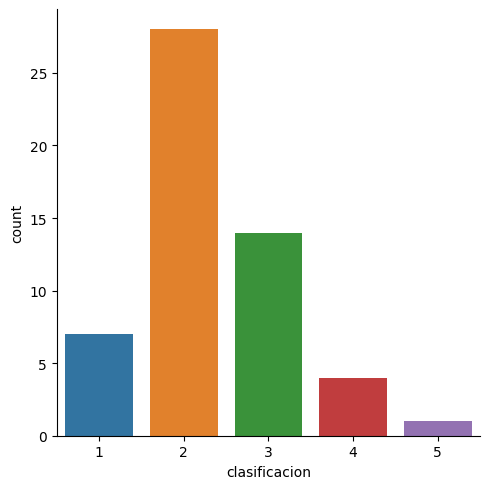

In [ ]:
sb.catplot(x='clasificacion',data=datos, kind="count") #grafica de barras - espacio entre las clasificaciones

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
datos2 = datos.drop(['Municipio','Poblacion','Rezago'],axis=1) #elimina columnas
datos2

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire,clasificacion
0,8.0,5.2,39.7,20.1,8.4,8.1,16.2,11.4,2.7,32.5,14.5,2
1,11.2,5.0,50.4,15.0,7.2,2.8,28.6,33.7,2.7,28.7,22.1,3
2,10.4,16.8,57.4,14.6,3.5,5.2,13.9,14.9,3.3,36.0,18.1,3
3,5.7,5.6,35.1,23.4,6.6,1.2,6.9,7.4,1.9,19.2,12.6,2
4,10.1,6.4,42.6,10.4,7.5,5.9,19.4,13.5,3.7,35.6,22.5,3
5,6.0,3.6,33.7,13.9,2.8,1.9,5.3,3.4,1.1,18.7,10.0,1
6,5.4,4.7,38.1,21.0,3.4,0.8,5.1,16.8,1.4,16.1,10.0,2
7,7.4,5.4,43.1,13.8,5.6,1.8,17.7,21.2,1.8,20.1,14.9,2
8,5.7,5.1,35.1,18.5,6.1,0.9,1.6,3.9,0.9,16.2,9.2,1
9,7.8,2.4,36.7,22.7,19.2,2.7,38.9,20.6,6.0,76.4,43.9,4


In [ ]:
X_train, X_test = train_test_split(datos2, test_size=0.3, random_state=42)


In [ ]:
y_train = X_train['clasificacion']
y_test = X_test['clasificacion']

In [ ]:
X_train = X_train.drop(['clasificacion'],axis=1)
X_train

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire
24,1.8,4.9,18.6,17.5,1.3,0.5,1.6,0.7,0.3,13.4,4.3
45,6.6,4.9,40.7,16.6,6.5,6.3,4.2,7.2,1.2,29.6,12.1
33,10.1,3.3,33.6,7.8,20.0,2.1,30.1,27.3,2.7,63.2,25.6
50,10.2,5.9,41.2,17.8,6.8,6.4,10.1,10.5,1.3,23.9,16.6
15,14.3,6.7,53.4,11.6,5.0,3.0,10.8,33.3,2.8,24.0,14.3
9,7.8,2.4,36.7,22.7,19.2,2.7,38.9,20.6,6.0,76.4,43.9
16,3.6,3.9,26.9,16.3,1.5,0.6,6.2,5.8,0.7,12.9,5.1
30,8.7,3.7,37.0,16.9,13.0,1.6,10.3,29.2,2.8,43.9,20.7
36,8.9,3.2,37.1,14.7,16.3,5.0,6.1,58.8,4.1,84.0,44.7
25,16.0,3.0,43.3,8.8,20.0,1.8,36.5,40.4,2.4,70.5,24.4


In [ ]:
X_test = X_test.drop(['clasificacion'],axis=1)
X_test

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire
19,9.7,4.9,47.8,19.9,8.2,4.6,19.1,12.0,3.8,28.0,18.9
49,7.3,3.8,37.3,10.5,12.7,2.2,33.7,21.1,4.2,65.1,43.4
48,6.6,2.8,33.7,13.1,13.6,1.1,7.1,22.7,1.7,57.5,22.6
12,6.7,5.6,34.7,15.5,6.3,2.9,13.9,12.5,3.9,29.8,17.4
44,8.4,7.3,54.3,14.2,3.3,8.3,10.6,11.4,1.0,19.8,17.9
5,6.0,3.6,33.7,13.9,2.8,1.9,5.3,3.4,1.1,18.7,10.0
17,5.9,4.6,34.4,26.6,3.1,11.1,10.3,15.0,2.1,27.1,12.2
52,11.1,4.0,42.6,7.9,13.3,1.7,14.0,29.5,1.7,72.2,35.0
3,5.7,5.6,35.1,23.4,6.6,1.2,6.9,7.4,1.9,19.2,12.6
32,10.9,4.5,37.1,18.0,13.8,1.7,16.5,18.8,1.8,63.1,28.2


In [ ]:
estandariza=StandardScaler() #estandariza los datos

In [ ]:
X_train = estandariza.fit_transform(X_train) #arroja las desviaciones de la estandarizacion de los datos
X_train

array([[-1.88573700e+00, -1.37527590e-01, -2.40141008e+00,
         3.53477720e-01, -1.19309929e+00, -1.07867478e+00,
        -1.09403222e+00, -1.23271117e+00, -1.40053933e+00,
        -1.05835547e+00, -1.30083420e+00],
       [-5.76995729e-01, -1.37527590e-01, -8.52588387e-02,
         1.39851439e-01, -2.05352717e-01,  6.63113090e-01,
        -8.75043667e-01, -8.11712824e-01, -8.63235649e-01,
        -3.01521458e-01, -6.23057075e-01],
       [ 3.77294781e-01, -7.68661958e-01, -8.29361727e-01,
        -1.94893886e+00,  2.35898934e+00, -5.98181576e-01,
         1.30641925e+00,  4.90143607e-01,  3.22704916e-02,
         1.26820834e+00,  5.50018722e-01],
       [ 4.04560224e-01,  2.56931390e-01, -3.28572269e-02,
         4.24686481e-01, -1.48367338e-01,  6.93143916e-01,
        -3.78108099e-01, -5.97975201e-01, -8.03535240e-01,
        -5.67814907e-01, -2.32031809e-01],
       [ 1.52244339e+00,  5.72498574e-01,  1.24574210e+00,
        -1.04696123e+00, -4.90279612e-01, -3.27904147e-01,
  

In [ ]:
X_test = estandariza.fit_transform(X_test) #arroja las desviaciones de la estandarizacion de los datos
X_test

array([[ 0.52334129,  0.05658274,  1.00853957,  0.61822058, -0.05730467,
         0.4801235 ,  0.43613645, -0.41457047,  1.23516842, -0.47589521,
        -0.11611695],
       [-0.49830104, -0.75733821, -0.44093155, -1.25994764,  0.72551799,
        -0.38664813,  1.68468395,  0.57059162,  1.58807368,  1.40945095,
         2.389723  ],
       [-0.79628005, -1.49726636, -0.93789308, -0.7404543 ,  0.88208252,
        -0.78391845, -0.59006697,  0.74380693, -0.61758421,  1.02323448,
         0.26231602],
       [-0.75371162,  0.57453244, -0.79984821, -0.26092199, -0.38782979,
        -0.13383974, -0.0085517 , -0.36044069,  1.32339474, -0.38442289,
        -0.26953573],
       [-0.0300483 ,  1.83241028,  1.90583122, -0.52066866, -0.90971156,
         1.81639641, -0.29075764, -0.47952621, -1.23516842, -0.89260244,
        -0.21839614],
       [-1.05169064, -0.90532384, -0.93789308, -0.5806102 , -0.99669185,
        -0.49499458, -0.74399748, -1.34560278, -1.1469421 , -0.9485022 ,
        -1.026

In [ ]:
knn = KNeighborsClassifier(10) #para datos numericos solamente

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pronostico = knn.predict(X_test) #predice el pronostico

In [ ]:
pronostico

array([2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2])

In [ ]:
print (knn.score(X_test,y_test)) #compara el pronostico de X_test y Y_test, con 76% de coincidencia

0.7647058823529411


In [ ]:
y_test

19    2
49    3
48    2
12    2
44    2
5     1
17    2
52    3
3     2
32    3
13    3
8     1
26    2
6     2
34    3
4     3
37    2
Name: clasificacion, dtype: int64

In [ ]:
confusion_matrix(y_test,pronostico)

array([[1, 1, 0],
       [0, 9, 0],
       [0, 3, 3]])

In [ ]:
#del lado vertical estan los valores originales, del lado horizontal esta el pronostico
#         Pronostico
#original
#
#

In [ ]:
datospron = ps.read_csv('/content/sample_data/datos_a_pronosticar.csv', delimiter=';')
datospron

,Municipio,Poblacion,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire
0,Cerro de San Pedro,"5,050",4.4,3.5,28.4,15.6,3.9,2.6,5.2,7.1,2.9,19.6,10.7
1,Ebano,"40,899",6.5,4.8,36.1,19.6,4.3,1.4,5.5,21.7,1.5,23.1,13.0
2,Tamasopo,"29,184",10.4,5.7,48.9,18.0,8.7,6.0,17.8,15.7,5.1,32.5,24.9
3,Aquismón,"48,359",15.3,5.6,49.0,22.3,20.0,4.3,27.3,47.2,7.8,76.0,56.7


In [ ]:
datospron = datospron.drop(['Municipio','Poblacion'],axis=1) #elimina columnas
datospron

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire
0,4.4,3.5,28.4,15.6,3.9,2.6,5.2,7.1,2.9,19.6,10.7
1,6.5,4.8,36.1,19.6,4.3,1.4,5.5,21.7,1.5,23.1,13.0
2,10.4,5.7,48.9,18.0,8.7,6.0,17.8,15.7,5.1,32.5,24.9
3,15.3,5.6,49.0,22.3,20.0,4.3,27.3,47.2,7.8,76.0,56.7


In [ ]:
datospron = estandariza.fit_transform(datospron) #arroja las desviaciones de la estandarizacion de los datos
datospron

array([[-1.14391431, -1.59029314, -1.38910185, -1.34410239, -0.81926107,
        -0.56087537, -0.94766424, -1.0588853 , -0.59834482, -0.80696641,
        -0.85166385],
       [-0.63818377, -0.11359237, -0.51237363,  0.29754938, -0.75772033,
        -1.25118351, -0.91517289, -0.08196742, -1.18619237, -0.65178057,
        -0.72629893],
       [ 0.30103008,  0.90873893,  0.9450447 , -0.35911132, -0.08077222,
         1.39499771,  0.41697226, -0.48344052,  0.32541561, -0.23499571,
        -0.07767174],
       [ 1.481068  ,  0.79514657,  0.95643078,  1.40566433,  1.65775362,
         0.41706117,  1.44586486,  1.62429324,  1.45912159,  1.69374269,
         1.65563452]])

In [ ]:
pronostico2 = knn.predict(datospron) #pronostico de los 4 municipios
pronostico2

array([1, 2, 2, 3])

In [ ]:
#Clasificacion
#1-Muy bajo, 2-Bajo, 3-Medio
#Segun esta clasificacion y de acuerdo a la clsificacion del pronostico
#Cerro de San Pedro - Clasficacion -1 - Muy bajo
#Ebano	- Clasficacion - 2 - Bajo
#Tamasopo	- Clasficacion - 2 - Bajo
#Aquismón - Clasficacion - 3 - Medio